# Tópicos Avanzados
## Proyecto 2

**Autores:** Andrés Parra, Ian Nicolás Rincón, John Sebastián Martínez, Carlos Mora, Rosemary Ríos

### Descripción del Proyecto

El modelo busca clasificar 10 categorías de productos. Los nodos representan bienes y los bordes representan que dos bienes frecuentemente se compran juntos. Considerando las reseñas de productos como características del nodo de una bolsa de palabras. La reseña la encontramos en el siguiente [link](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.Amazon.html?highlight=amazon).

- Node2Vect
- Deep Walk
- Graph Neural Network
- Graph convolutional network
- Graph atention network

Se instala varios paquetes de PyTorch Geometric, que es una extensión de PyTorch para el aprendizaje sobre gráficos. Ademas se aplica unas semillas para trabajar en el generador de números aleatorios en la GPU

In [1]:
# Correr para instalar, en caso de ser necesario
!pip install torch torchvision
!pip install torch-geometric

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## 0. Exploracion y analisis

### Grafica de grafo

Cada nodo en el gráfico representa un accesorio para computadores, y una arista entre dos nodos indica que los productos son frecuentemente comprados juntos. Los atributos de los nodos representan diversas características de los productos.

In [2]:
import os.path as osp
import torch
import pandas as pd
from torch_geometric.datasets import Amazon
import torch_geometric.transforms as T
import numpy as np
import random
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.cuda.manual_seed_all(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
# Carga del dataset
path = osp.join('.', 'data', 'Computers', 'Computers')
dataset = Amazon(path, 'Computers', transform=T.NormalizeFeatures())
data = dataset[0]
print(dataset.data)

Processing...


Data(x=[13752, 767], edge_index=[2, 491722], y=[13752])


Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


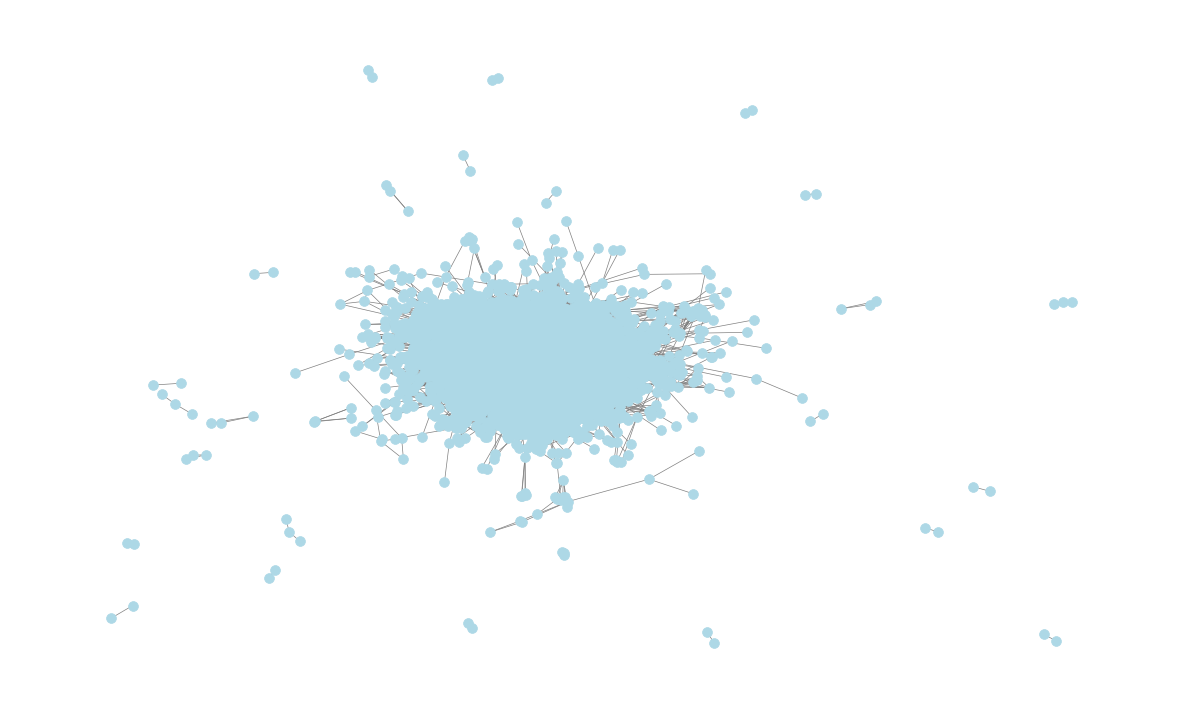

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
# Extract edge information from the dataset
edge_index = dataset[0].edge_index.tolist()

# Create a pandas DataFrame with the edge information
df = pd.DataFrame({
    'start_node': edge_index[0],
    'end_node': edge_index[1]
})

# Create a NetworkX graph from the DataFrame
G = nx.from_pandas_edgelist(df, "start_node", "end_node")

# Define plot options (optional)
plot_options = {
    'node_color': 'lightblue',
    'node_size': 50,
    'edge_color': 'gray',
    'linewidths': 0.5,
    'width': 0.5,
    'with_labels': False
}

# Compute the layout of the graph
pos = nx.spring_layout(G, iterations=15, seed=1721)

# Visualize the graph using NetworkX
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)
plt.show()

Se presentan 491722 posibles combinaciones de productos relacionados a los computadores donde se presenta 2 columnas que indica un producto en cada columna y el registro muestra la relación entre estos productos para ver si son complementarios o sustitutos

In [5]:
df

,start_node,end_node
0,0,507
1,0,6551
2,0,8210
3,0,9745
4,1,184
...,...,...
491717,13751,12081
491718,13751,12479
491719,13751,12751
491720,13751,13019


In [6]:
print(data,end="\n\n")

print("Dataset classes = " + str(dataset.num_classes))
print("Labels in [" + str(int(min(data.y))) + ", " + str(int(max(data.y))) + "]")
print("data.y = ",end="")
print(data.y,end="\n\n")

print("Number of Nodes = " + str(data.num_nodes))
print("Features per Node = " + str(dataset.num_node_features))
print("data.x = ", end="")
print(data.x,end="\n\n")

print("Number of edges = " + str(data.num_edges))
print("Features per edge = " + str(dataset.num_edge_features))
print("data.edge_index = ", end="")
print(data.edge_index)
print("data.edge_attr = ",end="")
print(data.edge_attr)

Data(x=[13752, 767], edge_index=[2, 491722], y=[13752])

Dataset classes = 10
Labels in [0, 9]
data.y = tensor([4, 4, 8,  ..., 8, 4, 0])

Number of Nodes = 13752
Features per Node = 767
data.x = tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0022, 0.0022, 0.0000,  ..., 0.0000, 0.0022, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0025, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0067, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0036, 0.0036, 0.0000,  ..., 0.0036, 0.0036, 0.0000]])

Number of edges = 491722
Features per edge = 0
data.edge_index = tensor([[    0,     0,     0,  ..., 13751, 13751, 13751],
        [  507,  6551,  8210,  ..., 12751, 13019, 13121]])
data.edge_attr = None


Hay 13,752 nodos (productos de computadores) en el grafo y cada nodo tiene 767 características, lo que indica que cada producto tiene un vector de 767 características que puede incluir información como descripción del producto, especificaciones técnicas, precios, reseñas, etc.
Hay 491,722 aristas en el grafo, esto quiere decir el número de veces en que fueron comprados dos productos juntos.
Cada accesorio de computador está clasificado en una de las 10 clases diferentes.
Las etiquetas de los nodos están en el rango de 0 a 9.
Cada nodo tiene un vector de características de longitud 767.
No hay características asociadas a las aristas.

In [7]:

# Obtener la lista de nodos del grafo
nodos = list(G.nodes())

# Definir el tamaño del subconjunto deseado
tamaño_subconjunto = 1000  # Por ejemplo, seleccionaremos 1000 nodos aleatoriamente

# Seleccionar aleatoriamente el subconjunto de nodos
subconjunto_nodos = random.sample(nodos, tamaño_subconjunto)

# Crear un nuevo grafo que contenga solo el subconjunto de nodos
subgrafo = G.subgraph(subconjunto_nodos)

# Ahora puedes realizar tus cálculos en el subgrafo, como calcular métricas de centralidad


### Atributos topológicos básicos

 Se toman 13471 productos (representa un 97,9% de los datos) para realizar el primer analisis descriptivo basico de los nodos

In [8]:
#Numeros de nodos
G.number_of_nodes()

13471

De esta muestra quedan 245861 relaciones entre los accesorios de computador (representa el 50% de compras de 2 productos al tiempo)

In [9]:
#Número total de aristas:
G.number_of_edges()

245861

En promedio, un nodo está conectado a casi 36 nodos más, esto quiere decir que en promedio los productos de computadores aparecen comprados con otro producto complementario en 36 ocasiones

In [10]:
np.mean([d for _, d in G.degree()])

36.50226412293074

Longitud de ruta más corta para todos los pares de nodos en la red:

In [ ]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

Se calcula el camino mas corto del producto cero al producto 13471 en donde se interpreta que para pasar de un producto a otro de forma mas rapida, se necesita en promedio 3 relaciones del producto cero con otros productos para que llegue al producto 13471

In [ ]:
#camino más corto al ultimo nodo
shortest_path_lengths[0][13471]

Se calcula el camino mas corto del producto cero al producto 13471 en donde se interpreta que para pasar de un producto a otro de forma mas rapida, se necesita en promedio 3 relaciones del producto cero con otros productos para que llegue al producto 6736, producto que está en la mitad del grafo

In [ ]:
#camino más corto al nodo intermedio
shortest_path_lengths[0][6736]

Se calcula el camino mas corto del producto cero al producto 13471 en donde se interpreta que para pasar de un producto a otro de forma mas rapida, se necesita en promedio 2 relaciones del producto cero con otros productos para que llegue al producto 3368, producto que se encuentra en el primer cuartil del grafo

In [ ]:
#curta parte inicial
shortest_path_lengths[0][3368]

In [ ]:
#curta parte final
shortest_path_lengths[0][3368]

In [ ]:
#Aleatorio
shortest_path_lengths[0][50]

Computacionalmente es muy dificil calcular el promedio de las distancias más cortas pero de acuerdo con las muestras aleatorias esta esta entre 4 y 5

In [ ]:
#################################### NO EJECUTAR ################ TARDA MUCHO Y SE CONSUME TODA LA RAM
#total_distance_sum = 0
#pair_count = 0

# Itera sobre todos los nodos y utiliza Dijkstra para encontrar las distancias más cortas desde cada nodo
#for node in G.nodes():
    # Utiliza Dijkstra para encontrar las distancias más cortas desde el nodo actual a todos los demás nodos
 #   shortest_paths = nx.single_source_dijkstra_path_length(G, node)

    # Suma las distancias y cuenta los pares de nodos
  #  total_distance_sum += sum(shortest_paths.values())
   # pair_count += len(shortest_paths) - 1  # Resta 1 para excluir la distancia al propio nodo

# Calcula el promedio de las distancias más cortas
#average_shortest_path_length = total_distance_sum / pair_count

#print("El promedio de las distancias más cortas entre todos los pares de nodos es:", average_shortest_path_length)

In [ ]:



#Existen unos nodos que no tinen enlaces con los vecinos por tal motivo primero vamos a calcular
#el diametro de cada componente conectada utilizando las distancias más cortas precalculadas

def diameter_of_connected_component(G, shortest_path_lengths):

    connected_components = list(nx.connected_components(G))

    # Inicializar el diámetro
    diameter = 0

    # Calcular el diámetro de cada componente conectada
    for component in connected_components:
        # Crear un subgrafo de la componente conectada
        subgraph = G.subgraph(component)
        # Calcular el diámetro de la componente conectada utilizando las distancias más cortas precalculadas
        component_diameter = max(max(shortest_path_lengths[node].values()) for node in component)
        diameter = max(diameter, component_diameter)

    return diameter


El resultado indica que el diámetro del grafo, considerando solo las componentes conectadas, es 10. Esto significa que dentro de la componente conectada más extensa del grafo, la mayor distancia entre cualquier par de nodos es 10 aristas, evidenciando que las maximas relaciones que se pueden dar entre productos es de 10 ocasiones con el objetivo de que se conecte un producto a otro

In [ ]:
# Calcular las distancias más cortas entre todos los pares de nodos
#shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

diameter = diameter_of_connected_component(G, shortest_path_lengths)
print("Diámetro del grafo (ignorando nodos sin conexiones):", diameter)

In [ ]:

path_lengths = np.zeros(diameter + 1, dtype=int)

#Extraer la frecuencia de las longitudes de ruta más cortas entre dos nodos
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts


freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()


fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

El gráfico anterior muestra una distribución de la frecuencia de los caminos mas cortos sesgado a la derecha ya que la moda es menor que la mediana (como podemos evidenciar 3 conexiones de productos tiene una mayor frecuencia la cual es la moda y 4 conexiones representan la mediana). Como se puede observar el 43% de los datos se encuentran conectados entre 3 vertices y es poco probable observar nodos conectados por 9 o más vertices (Menos del 0%).

In [ ]:
nx.density(G)

En el grado existe aproximadamente el 0.27% de todas las posibles conexiones entre productos. Esto quiere decir que los productos no están altamente interconectados en el grafo por razones como que los clientes no suelen comprar grandes cantidades de productos juntos o que existen diferentes grupos de productos que no tienen muchas conexiones entre sí.

In [ ]:
nx.number_connected_components(G)

El grafo se divide en 33 grupos de productos interconectados, pero que no tienen conexiones directas entre ellos.

Los productos en Amazon forman diferentes grupos o comunidades que están conectados internamente pero no tienen conexiones directas con otros grupos.

Una densidad baja y un número relativamente alto de componentes conectadas sugieren una estructura dispersa con grupos de productos interconectados internamente pero no directamente entre sí.

**Grado de Centralidad**

Evalua la importancia de los nodos individuales dentro de una red

In [ ]:
degree_centrality = nx.centrality.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

El anterior codigo presenta el top 5 de productos que tienen un alto grado de conexiones directas, en donde se observa que el producto 12888 es el que tiene una conexión directa del 22,21% de los otros productos, luego le sigue el producto 8210 y 8140 con un 18% y el ultimo es el producto 1524 con una conexión directa del 11,6% con otros productos

In [ ]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:5]

El producto 12888 ha sido comprado junto con otros productos aproximadamente 2992 veces en el conjunto de datos.

El producto 8210 ha sido comprado junto con otros productos aproximadamente 2508 veces en el conjunto de datos.

El producto 8140 ha sido comprado junto con otros productos aproximadamente 2495 veces en el conjunto de datos.

El producto 4528 ha sido comprado junto con otros productos aproximadamente 1850 veces en el conjunto de datos.

El producto 1524 ha sido comprado junto con otros productos aproximadamente 1565 veces en el conjunto de datos.

In [ ]:
degree_centrality_values = list(degree_centrality.values())

plt.figure(figsize=(15, 8))
plt.hist(degree_centrality_values, bins=25, color='red')
plt.xticks(ticks=[0, 0.025, 0.05, 0.07])
plt.title("Degree Centrality Histogram", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

En el gráfico anterior se evidencia que hay pocas conexiones directas para 13 mil productos, mientras que menos de 100 productos tienen una conexión directa del 2,5%

In [ ]:
node_size = [v * 1000 for v in degree_centrality.values()]
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

**Centralidad Intermedia**

Nos indica como un nodo puede actuar como puente entre otros nodos

In [ ]:
#Se toma una muestra dada la volumetria la memoria RAM no puede ejecutar este
#betweenness_centrality = nx.centrality.betweenness_centrality(G)
#(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

In [ ]:
import random
import networkx as nx
random.seed(42)
tamano_muestreo = 1000
# Seleccionamos un subconjunto aleatorio de nodos del grafo
nodos_muestreo = random.sample(G.nodes(), tamano_muestreo)

# Creamos un subgrafo que contenga solo los nodos seleccionados
subgrafo = G.subgraph(nodos_muestreo)

# Calculamos la centralidad de intermediación para el subgrafo
betweenness_centrality = nx.betweenness_centrality(subgrafo)

# Ordenamos y mostramos los resultados
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
print("Top 5 nodos por centralidad de intermediación:")
print(sorted_betweenness[:5])


El anterior codigo presenta el top 5 de productos con la mas alta tasa de intermediación (productos 8140, 8872, 904, 7797 y 11262)

Estos productos sirven como puente para comprar otros productos en conjunto cerca del 34% para el producto 8140 mientras que para los demás se encuentra con una intermediación entre el 3%-4%

Las compras que incluyen estos productos tienden a conectar otros productos, lo que sugiere su relevancia en estrategias de recomendación y análisis de patrones de compra.

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2])
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

El gráfico anterior concluye que la mayoria de casos no tienen una intermediación y que pocos casos son los que tienen una intermadiación mayor al 1%

In [ ]:
# Normalizamos los tamaños de los nodos para que estén en el rango [0, 1]
max_size = max(node_size)
min_size = min(node_size)
node_size_normalized = [(v - min_size) / (max_size - min_size) for v in node_size]

# Escalamos los tamaños de los nodos al rango deseado
node_size_scaled = [v * 1200 for v in node_size_normalized]


In [ ]:
node_size = [v * 1200 for v in betweenness_centrality.values()]

# Creamos la visualización del grafo
plt.figure(figsize=(15, 8))
pos = nx.spring_layout(subgrafo)  # Seleccionamos un layout (distribución) para el grafo
nx.draw_networkx(subgrafo, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")
plt.show()

**Centralidad de cercania**

Nos indica que tan cerca esta un nodo de otros nodos.

In [ ]:
### sin RAM para ejecutarlo
#Calcular el nodo con mayor cercania
#closeness_centrality = nx.centrality.closeness_centrality(G)
#(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

In [ ]:

random.seed(42)
# Definimos el tamaño del muestreo
tamano_muestreo = 1000

# Seleccionamos un subconjunto aleatorio de nodos del grafo
nodos_muestreo = random.sample(G.nodes(), tamano_muestreo)

# Creamos un subgrafo que contenga solo los nodos seleccionados
subgrafo = G.subgraph(nodos_muestreo)

# Calculamos la centralidad de cercanía para el subgrafo
closeness_centrality = nx.closeness_centrality(subgrafo)

# Ordenamos y mostramos los resultados de los 5 nodos con mayor cercanía
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
print("Top 5 nodos por centralidad de cercanía:")
print(sorted_closeness[:5])


Se presenta que los productos 8140, 7939, 11262, 4135 y 3697 se compran mas rapido con otros productos en su respectivo camino mas corto entre un 25% al 19% de rapidez de conexión

La distancia entre el nodo 8140 con un nodo aleatorio es de aproximadamente 3

In [ ]:
##ajustar
1 / closeness_centrality[8140]

El anterior indicador calcula la distancia mas larga del producto 8140 (el cual es el que tiene mayores conexiones con otros productos) y se observa que la longitud es de 395% para conectarse con el producti mas lejano

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

El anterior histograma presenta que 300 productos no tienen una centralidad de cercania.
Tambien se observa que cerca de 70 productos tienen una crentralidad de cercania entre el 18%-19% (esta es la moda)

In [ ]:
# Calcular las posiciones de los nodos utilizando un layout
pos = nx.spring_layout(subgrafo)

# Asegurarse de que solo estamos considerando los nodos presentes en el subgrafo
node_size = [v * 50 for node, v in closeness_centrality.items() if node in subgrafo.nodes()]

plt.figure(figsize=(15, 8))
nx.draw_networkx(subgrafo, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")
plt.show()

**Eigenvector Centrality**
Importanacia de los nodos si sus nodos vecinos son importantes de igual forma. Es dicir, un tuit es importante si es referenciado por alguien considerado importante

In [ ]:
### Sin RAM para ejecutar
##eigenvector_centrality = nx.centrality.eigenvector_centrality(G)
###(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

In [ ]:
# Fijamos la semilla para reproducibilidad
random.seed(42)


# Definimos el tamaño del muestreo
tamano_muestreo = 1000

# Seleccionamos un subconjunto aleatorio de nodos del grafo
nodos_muestreo = random.sample(G.nodes(), tamano_muestreo)

# Creamos un subgrafo que contenga solo los nodos seleccionados
subgrafo = G.subgraph(nodos_muestreo)

# Calculamos la centralidad del vector propio para el subgrafo
eigenvector_centrality = nx.eigenvector_centrality(subgrafo)

# Ordenamos y mostramos los resultados de los 5 nodos con mayor centralidad del vector propio
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
print("Top 5 nodos por centralidad del vector propio:")
print(sorted_eigenvector[:5])

El codigo anterior presenta el top 5 de productos con mayor centralidad del vector propio dando las siguientes conclusiones:

El nodo 8140 tiene la mayor centralidad del vector (56%) propio en el grafo. Esto indica que este producto es extremadamente importante en términos de influencia y conexiones en la red de productos de Amazon. Puede ser un producto central que está vinculado a muchos otros productos directamente y a través de sus conexiones.

El nodo 4135 tiene una influencia del 25% en la red de productos de computadores de Amazon

Los productos 13160, 3067 y 5715 tienen una influencia entre 14%-15% en la red de productos de computadores de Amazon

Con esta métrica se identifica productos clave para diseñar estrategias efectivas en términos de recomendaciones, marketing y análisis de patrones de compra.


In [ ]:
#Validar como se conectan los nodos de la muestra con el más importante (8140)
high_eigenvector_centralities = (sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[1:15]
high_eigenvector_nodes = [
    tuple[0] for tuple in high_eigenvector_centralities]
neighbors_1912 = [n for n in G.neighbors(8140)]
all(item in neighbors_1912 for item in high_eigenvector_nodes)

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.xticks(ticks=[0, 0.01, 0.02])
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

El anterior histograma que está sesgada a la derecha muestra que la mayoria de productos no son productos claves, mientras que menos de 10 productos tienen un peso por encima del 10% de influencia dentro de la red

In [ ]:
pos = nx.spring_layout(subgrafo)

# Asegurarse de que solo estamos considerando los nodos presentes en el subgrafo
node_size = [eigenvector_centrality.get(node, 0) * 4000 for node in subgrafo.nodes()]

plt.figure(figsize=(15, 8))
nx.draw_networkx(subgrafo, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")
plt.show()

**Coeficiente de Agrupamiento**

In [ ]:
nx.average_clustering(G)

En promedio Un 35,1% de los produtos están relativamente bien conectados con sus vecinos. Significa que existe una tendencia a que los productos se agrupen o formen comunidades dentro de la red de compras.

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

Mas de 700 casos tienen una probabilidad de agruparse cerca de un 38%

In [ ]:
triangles_per_node = list(nx.triangles(G).values())
sum(
    triangles_per_node
) / 3

Se presenta 4582407 combinaciones de 3 productos que se compran al mismo tiempo

In [ ]:
#Número promedio de triángulos de los que forma parte un nodo
np.mean(triangles_per_node)

En promedio hay 340 canastas de compras donde se compran los mismos 3 productos a la vez, indicando que los clientes tienden a comprar conjuntos de tres productos juntos o que hay productos que se compran en conjunto frecuentemente.

In [ ]:
#Calculo de la mediana
np.median(triangles_per_node)

El producto que se encuentra en la mitad de la distribución del nodo tiene 72 casos en donde se compran 3 productos al mismo tiempo

In [ ]:
#Cantidad de aristas puentes
bridges = list(nx.bridges(G))
len(bridges)

Hay 342 puentes en el grafo de compra de amazon, lo que quiere decir que hay muchas conexiones críticas en el grafo de productos de Amazon

In [ ]:
#Calculo de arista que si se eliminan desconectaría el grafo localmente, es decir,
# separaría una comunidad de nodos del resto del grafo.
local_bridges = list(nx.local_bridges(G, with_span=False))
len(local_bridges)

Existen 6406 puentes locales en el grafo de productos de Amazon indicando la presencia de muchas conexiones críticas para la conectividad de nodos vecinos. Estas conexiones son importantes para mantener la accesibilidad entre grupos de productos o entre clientes con preferencias similares de compra.

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)

plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(
    G, pos, edgelist=local_bridges, width=0.5, edge_color="lawngreen"
)
nx.draw_networkx_edges(
    G, pos, edgelist=bridges, width=0.5, edge_color="r"
)
plt.axis("off")



En el grafo anterior se presentan todos los puentes que conectan las compras de varios productos en Amazon

**Asortatividad**

In [ ]:
nx.degree_assortativity_coefficient(G)

 Se indica una tendencia de disasortativity, lo que significa que los nodos con un grado alto tienden a conectarse con nodos de grado bajo y viceversa. En el contexto de productos de Amazon, esto puede significar que los productos populares (con alto grado) tienden a estar conectados con productos menos populares (con bajo grado), y viceversa.

In [ ]:
from random import randint

colors = [""] * G.number_of_nodes()  # Inicializa la lista de colores con la longitud adecuada
node_index_map = {node: i for i, node in enumerate(G.nodes())}  # Mapa de nodos a índices en la lista colors
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # Crea un color RGB aleatorio
    counter += 1
    for node in list(com):
        colors[node_index_map[node]] = color
counter

Se identificaron 136 comunidades en el grafo

In [ ]:
# Ajustamos las posiciones con spring_layout y establecemos la semilla para reproducibilidad
pos = nx.spring_layout(G, iterations=15, seed=1721)


plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors)
plt.show()

En el gráfo anterior se presentan las diferentes comunidades identificadas en donde la comunidad coloreada de purpura oscura es la comunidad mas grande en las compras de Amazon

In [ ]:
#Eliminar los nodos que no estan alejados
import networkx as nx
from random import randint


# Obtener las componentes conectadas
connected_components = list(nx.connected_components(G))

# Encontrar el componente más grande
largest_component_nodes = max(connected_components, key=len)
largest_component = G.subgraph(largest_component_nodes)

# Inicializar la lista de colores con la longitud adecuada
colors = [""] * largest_component.number_of_nodes()

# Ejecutar el algoritmo de detección de comunidades en el componente más grande
for com in nx.community.asyn_fluidc(largest_component, 8, seed=0):
    color = "#%06X" % randint(0, 0xFFFFFF)  # Crear un color RGB aleatorio
    for node in list(com):
        # Verificar que el nodo está en el subgrafo
        if node in largest_component:
            # Obtener el índice del nodo en el subgrafo
            node_index = list(largest_component.nodes()).index(node)
            colors[node_index] = color

In [ ]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
connected_components = list(nx.connected_components(G))

# Encontrar el componente más grande
largest_component_nodes = max(connected_components, key=len)
largest_component = G.subgraph(largest_component_nodes)

# Inicializar la lista de colores con la longitud adecuada
colors = [""] * largest_component.number_of_nodes()

# Ejecutar el algoritmo de detección de comunidades en el componente más grande
for com in nx.community.asyn_fluidc(largest_component, 8, seed=0):
    color = "#%06X" % randint(0, 0xFFFFFF)  # Crear un color RGB aleatorio
    for node in list(com):
        # Verificar que el nodo está en el subgrafo
        if node in largest_component:
            # Obtener el índice del nodo en el subgrafo
            node_index = list(largest_component.nodes()).index(node)
            colors[node_index] = color  # Asignar el color al nodo en el índice correspondiente

# Dibujar el grafo con colores asignados a los nodos
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    largest_component, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)
plt.show()

Para el grafo anterior se quitó los nodos sin conexiones para ver como se agrupan en comunidades las compras de Amazon y se evidencia que las comunidades mas grandes son la rosada y verde oscuro las que tienen un comportamiento de compras similares

## 1. Graph Neural Network (GNN)

### Sin Early Stop

In [ ]:
import torch
torch.manual_seed(0)
from torch.nn import Linear
import torch.nn.functional as F

from torch_geometric.utils import to_dense_adj
from torch_geometric.datasets import Amazon
from torch_geometric.utils import train_test_split_edges

# Import dataset from PyTorch Geometric
dataset = Amazon(root=".", name="Computers")

# Access the first data instance
data = dataset[0]

# Define train, validation, and test masks
num_nodes = data.num_nodes
train_mask = torch.arange(int(num_nodes*0.6))
test_mask = torch.arange(int(num_nodes*0.6), int(num_nodes*0.9))
val_mask = torch.arange(int(num_nodes*0.9), num_nodes)
# Apply the masks to the data
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency)) # A 2-D tensor with ones on the diagonal and zeros elsewhere
adjacency

def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)

class SparseLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        x = self.linear(x)
        x = torch.sparse.mm(adjacency, x)
        return x


class GNN(torch.nn.Module):
    """Vanilla Graph Neural Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = SparseLayer(dim_in, dim_h)
        self.gnn2 = SparseLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc


# Create the Vanilla GNN model
gnn = GNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)

# Train
gnn.fit(data, epochs=100)

# Test
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

### Con Early Stop

In [ ]:
import torch
torch.manual_seed(0)
from torch.nn import Linear
import torch.nn.functional as F

from torch_geometric.utils import to_dense_adj
from torch_geometric.datasets import Amazon
from torch_geometric.utils import train_test_split_edges

# Import dataset from PyTorch Geometric
dataset = Amazon(root=".", name="Computers")

# Access the first data instance
data = dataset[0]

# Define train, validation, and test masks
num_nodes = data.num_nodes
train_mask = torch.arange(int(num_nodes*0.6))
test_mask = torch.arange(int(num_nodes*0.6), int(num_nodes*0.9))
val_mask = torch.arange(int(num_nodes*0.9), num_nodes)
# Apply the masks to the data
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency)) # A 2-D tensor with ones on the diagonal and zeros elsewhere
adjacency

def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)

class SparseLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        x = self.linear(x)
        x = torch.sparse.mm(adjacency, x)
        return x


class GNN(torch.nn.Module):
    """Vanilla Graph Neural Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = SparseLayer(dim_in, dim_h)
        self.gnn2 = SparseLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):

        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        best_val_acc = 0
        epochs_no_improve = 0
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()


            val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
            val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
            if(epoch % 20 == 0):
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

            #print(f"actual acc: {float(val_acc):.2f}, best acc:{float(best_val_acc):.2f}, epoc no impro:{float(epochs_no_improve):.2f}")
            if val_acc >= float(best_val_acc):
                best_val_acc = val_acc
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
            if epochs_no_improve == 5:
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')
                print("Early stopping due to no improvement in validation accuracy.")
                break

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc


# Create the Vanilla GNN model
gnn = GNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)

# Train
gnn.fit(data, epochs=100)

# Test
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

## 2. Graph Convolutional Network (GCN)

### Red1
- 1 Capa intermedia
- Función activación ReLu

In [ ]:
import torch
from torch.nn import Linear, Dropout
import torch.nn.functional as F
from torch_geometric.datasets import Amazon
from torch_geometric.utils import to_dense_adj
from torch_geometric.utils import degree
from torch_geometric.nn import GCNConv
from collections import Counter
import numpy as np
import random

# Fijar semillas para reproducibilidad
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)

# Import dataset from PyTorch Geometric
dataset = Amazon(root=".", name="Computers")
data = dataset[0]

# Se crean particiones en entrenamiento con los primeros 18 mil datos, de validación desde el 180001 al dato 20 mil y los datos restantes para la prueba
data.train_mask = range(11000)
data.val_mask = range(11001, 12000)
data.test_mask = range(12001, 13752)

# Get list of degrees for each node
degrees = degree(data.edge_index[0]).numpy()

# Count the number of nodes for each degree
numbers = Counter(degrees)

# Se construye una red neuronal convolucional para grafos (GCN)
class GCN1(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)

# Se realiza el proceso de propagación hacia adelante (forward propagation) en una Red Convolutiva de Grafos
def forward(self, x, edge_index):
    h = self.gcn1(x, edge_index) # Primera capa
    h = torch.relu(h) #  Aplica la función de activación ReLU
    h = self.gcn2(h, edge_index) # Segunda capa
    return F.log_softmax(h, dim=1) # Calcula el logaritmo de la función softmax para representar las probabilidades de pertenecer a cada clase para cada nodo del grafo
GCN1.forward = forward

# Funcion fit
def fit(self, data, epochs):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(self.parameters(),
                                  lr=0.01,
                                  weight_decay=5e-4)
    self.train()
    for epoch in range(epochs+1):
        optimizer.zero_grad()
        out = self(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        acc = accuracy(out[data.train_mask].argmax(dim=1),
                      data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        if(epoch % 20 == 0):
            val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
            val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                              data.y[data.val_mask])
            print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                  f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                  f'Val Acc: {val_acc*100:.2f}%')
GCN1.fit = fit

@torch.no_grad()
def test(self, data):
    self.eval()
    out = self(data.x, data.edge_index)
    acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
    return acc
GCN1.test = test

# Fijar semillas para reproducibilidad
torch.manual_seed(19)
np.random.seed(19)
random.seed(19)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(19)

# Train GCN
gcn1 = GCN1(dataset.num_features, 16, dataset.num_classes)
print(gcn1)
gcn1.fit(data, epochs=100)
accuracyGCN1 = gcn1.test(data)
# aplicando redes neuronales convolucionales se idententifica una mejoria en el accuracy con respecto al resultado en el GNN que del 85.38%
print(f'\nGCN test accuracy: {accuracyGCN1*100:.2f}%\n')

### Red 2
- Dos capas ocultas
- Leaky Relu
- Early Stop 10 epocas

In [ ]:
class GCN2(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_h)  # Segunda capa oculta
        self.gcn3 = GCNConv(dim_h, dim_out)  # Salida

    def forward(self, x, edge_index):
        x = self.gcn1(x, edge_index)
        x = F.leaky_relu(x, negative_slope=0.01)
        x = self.gcn2(x, edge_index)
        x = F.leaky_relu(x, negative_slope=0.01)
        x = self.gcn3(x, edge_index)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs, patience=10):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        best_val_loss = float('inf')
        patience_counter = 0
        best_model_state = None  # Para guardar el estado del modelo

        for epoch in range(epochs):
            self.train()
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            self.eval()
            with torch.no_grad():
                val_out = self(data.x, data.edge_index)
                val_loss = criterion(val_out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(val_out[data.val_mask].argmax(dim=1), data.y[data.val_mask])

            if epoch % 20 == 0:
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

            if val_loss < best_val_loss:
               best_val_loss = val_loss
               patience_counter = 0
               best_model_state = self.state_dict()  # Guarda el estado actual del modelo como el mejor
            else:
                patience_counter += 1
                if patience_counter >= patience:
                  print("Stopping early due to no improvement in validation loss.")
                  self.load_state_dict(best_model_state)  # Restaura el mejor estado antes de parar
                  break

    def test(self, data):
      self.eval()
      out = self(data.x, data.edge_index)
      acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
      return acc

# Train GCN
# Inicializar el modelo
gcn2 = GCN2(dataset.num_features, 16, dataset.num_classes)

# Entrenar el modelo
gcn2.fit(data, epochs=100)
# Evaluar el modelo
accuracyGCN2 = gcn2.test(data)
print(f'\nGCN test accuracy: {accuracyGCN2 * 100:.2f}%\n')

### Red 3
- 5 capas ocultas
- Se agrego una capa oculta adicional para mejorar el modelo
- Se cambio la función de activación ReLU por LeakyReLU para ambas capas ocultas
- Se implemento un early stop para detener el modelo si no mejora despues de 20 epocas


In [ ]:
class GCN3(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_h)  # Segunda capa oculta
        self.gcn3 = GCNConv(dim_h, dim_h)  # Tercer capa oculta
        self.gcn4 = GCNConv(dim_h, dim_h)  # Cuarta capa oculta
        self.gcn5 = GCNConv(dim_h, dim_out)  # Salida

    def forward(self, x, edge_index):
        x = self.gcn1(x, edge_index)
        x = torch.tanh(x)
        x = self.gcn2(x, edge_index)
        x = torch.tanh(x)
        x = self.gcn3(x, edge_index)
        x = torch.tanh(x)
        x = self.gcn4(x, edge_index)
        x = torch.tanh(x)
        x = self.gcn5(x, edge_index)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs, patience=20):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        best_val_loss = float('inf')
        patience_counter = 0
        best_model_state = None  # Para guardar el estado del modelo

        for epoch in range(epochs):
            self.train()
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            self.eval()
            with torch.no_grad():
                val_out = self(data.x, data.edge_index)
                val_loss = criterion(val_out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(val_out[data.val_mask].argmax(dim=1), data.y[data.val_mask])

            if epoch % 20 == 0:
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

            if val_loss < best_val_loss:
               best_val_loss = val_loss
               patience_counter = 0
               best_model_state = self.state_dict()  # Guarda el estado actual del modelo como el mejor
            else:
                patience_counter += 1
                if patience_counter >= patience:
                  print("Stopping early due to no improvement in validation loss.")
                  self.load_state_dict(best_model_state)  # Restaura el mejor estado antes de parar
                  break

    def test(self, data):
      self.eval()
      out = self(data.x, data.edge_index)
      acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
      return acc

# Train GCN
# Inicializar el modelo
gcn3 = GCN3(dataset.num_features, 16, dataset.num_classes)

# Entrenar el modelo
gcn3.fit(data, epochs=100)
# Evaluar el modelo
accuracyGCN3 = gcn3.test(data)
print(f'\nGCN test accuracy: {accuracyGCN3 * 100:.2f}%\n')

## 3. Graph Attention Convolution Network (GAT)

### Attention con 2 capas

In [ ]:
import torch
torch.manual_seed(1)
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, GCNConv
from torch.nn import Linear, Dropout
from torch_geometric.datasets import Amazon

# Import dataset from PyTorch Geometric
dataset = Amazon(root=".", name="Computers")

# Access the first data instance
data = dataset[0]

# Define train, validation, and test masks
num_nodes = data.num_nodes
train_mask = torch.arange(int(num_nodes*0.6))
test_mask = torch.arange(int(num_nodes*0.6), int(num_nodes*0.9))
val_mask = torch.arange(int(num_nodes*0.9), num_nodes)
# Apply the masks to the data
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

# Definicion de metrica
def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)

# Inicializacion de la clase
class GAT0(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out, heads=8):
        super().__init__()
        self.gat1 = GATv2Conv(dim_in, dim_h, heads=heads)
        self.gat2 = GATv2Conv(dim_h*heads, dim_out, heads=1)

# Funcion para foward
def forward(self, x, edge_index):
    h = F.dropout(x, p=0.6, training=self.training)
    h = self.gat1(h, edge_index)
    h = F.elu(h)
    h = F.dropout(h, p=0.6, training=self.training)
    h = self.gat2(h, edge_index)
    return F.log_softmax(h, dim=1)
GAT0.forward = forward

# Funcion para fit
def fit(self, data, epochs):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=0.01)
    self.train()
    for epoch in range(epochs+1):
        optimizer.zero_grad()
        out = self(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        if(epoch % 20 == 0):
            val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
            val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
            print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
GAT0.fit = fit

# Funcion para test
@torch.no_grad()
def test(self, data):
    self.eval()
    out = self(data.x, data.edge_index)
    acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
    return acc
GAT0.test = test

# Create the Vanilla GNN model
gat0 = GAT0(dataset.num_features, 32, dataset.num_classes)
print(gat0)

# Entrenamiento
gat0.fit(data, epochs=100)

# Test
acc = gat0.test(data)
print(f'GAT test accuracy: {acc*100:.2f}%')

### Attention con multiples capas intermedias
- Con n capas intermedias

In [ ]:
import torch
torch.manual_seed(1)
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, GCNConv
from torch.nn import Linear, Dropout
from torch_geometric.datasets import Amazon

# Import dataset from PyTorch Geometric
dataset = Amazon(root=".", name="Computers")
# Access the first data instance
data = dataset[0]
# Define train, validation, and test masks
num_nodes = data.num_nodes
train_mask = torch.arange(int(num_nodes*0.6))
test_mask = torch.arange(int(num_nodes*0.6), int(num_nodes*0.9))
val_mask = torch.arange(int(num_nodes*0.9), num_nodes)
# Apply the masks to the data
data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

# Definicion de metrica
def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)

# Modelo
class GAT1(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out, num_layers=3, heads=8):
        super().__init__()
        self.num_layers = num_layers

        # Primera capa GAT
        self.gat_layers = torch.nn.ModuleList()
        self.gat_layers.append(GATv2Conv(dim_in, dim_h, heads=heads))

        # Capas intermedias GAT
        for _ in range(num_layers - 2):
            self.gat_layers.append(GATv2Conv(dim_h * heads, dim_h, heads=heads))

        # Última capa GAT
        self.gat_layers.append(GATv2Conv(dim_h * heads, dim_out, heads=1))

        # Dropout
        self.dropout = Dropout(p=0.6)

    def forward(self, x, edge_index):
        h = x
        for i, gat_layer in enumerate(self.gat_layers):
            h = self.dropout(h)
            h = gat_layer(h, edge_index)
            if i < self.num_layers - 1:
                h = F.elu(h)
        return F.log_softmax(h, dim=1)

# Funcion para fit
def fit(self, data, epochs):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=0.01)
    self.train()
    for epoch in range(epochs+1):
        optimizer.zero_grad()
        out = self(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
        loss.backward()
        optimizer.step()
        if(epoch % 20 == 0):
            val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
            val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
            print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
GAT1.fit = fit

# Funcion para test
@torch.no_grad()
def test(self, data):
    self.eval()
    out = self(data.x, data.edge_index)
    acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
    return acc
GAT1.test = test

# Create the Vanilla GNN model
gat1 = GAT1(dataset.num_features, 32, dataset.num_classes)
print(gat1)

# Entrenamiento
gat1.fit(data, epochs=100)

# Test
acc = gat1.test(data)
print(f'GAT test accuracy: {acc*100:.2f}%')

## 4. Análisis de mejor modelo: (GAT 2 capas)

(Correr primero modelo GAT sin capas intermedias)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Asumiendo que tu modelo y datos ya están en el dispositivo correcto
gat0.eval()  # Establecer el modelo en modo evaluación

with torch.no_grad():
    logits = gat0(data.x, data.edge_index)  # Logits son las salidas del modelo antes de la activación softmax
    predictions = logits.argmax(dim=1)  # Obtener la clase predicha

# Etiquetas reales
true_labels = data.y

# Verificar que estén en la CPU para trabajar con numpy
if predictions.is_cuda:
    predictions = predictions.cpu()
if true_labels.is_cuda:
    true_labels = true_labels.cpu()

predictions = predictions.numpy()
true_labels = true_labels.numpy()

# Calcular la matriz de confusión
conf_mat = confusion_matrix(true_labels, predictions, labels=np.arange(dataset.num_classes))

# Normalizar la matriz de confusión por filas
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_normalized, annot=True, fmt=".2%", cmap='Blues', cbar=False, xticklabels=range(1, dataset.num_classes+1), yticklabels=range(1, dataset.num_classes+1))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix - Heatmap')
plt.show()